In [ ]:
!pip install --upgrade tensorflow
!pip install opencv-python
!pip install mediapipe
!pip install pandas
!pip install glob
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 47.2 MB/s eta 0:00:00
ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


In [ ]:
!unzip /content/sample_data/dataset.zip

Archive:  /content/sample_data/dataset.zip
   creating: dataset/
  inflating: dataset/ab_crunch1_1.csv  
  inflating: dataset/ab_crunch2.csv  
  inflating: dataset/cobra1.csv      
  inflating: dataset/cobra2.csv      
  inflating: dataset/cobra3.csv      
  inflating: dataset/jumping_jack1.csv  
  inflating: dataset/jumping_jack2.csv  
  inflating: dataset/jumping_jack3.csv  
  inflating: dataset/plank_data1.csv  
  inflating: dataset/plank_data2.csv  
  inflating: dataset/pushup_data.csv  
  inflating: dataset/pushup_data2_2.csv  
  inflating: dataset/pushup_data3.csv  
  inflating: dataset/squat_data1.csv  
  inflating: dataset/squat_data2.csv  
  inflating: dataset/squat_data3.csv  


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data

In [ ]:
import glob
import pandas as pd

# Path ke folder yang berisi file CSV
folder_path = "/content/dataset/*.csv"

# List untuk menyimpan semua DataFrame
dataframes = []

# Loop melalui semua file CSV di folder
for file_path in glob.glob(folder_path):
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Gabungkan semua DataFrame menjadi satu (opsional)
data = pd.concat(dataframes, ignore_index=True)

In [ ]:
data.shape

(3243, 100)

In [ ]:
data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32,label
0,0.505124,0.515323,0.520483,0.525223,0.495330,0.488206,0.482453,0.535646,0.472511,0.517146,...,-0.008098,-0.036578,-0.039937,0.143461,0.151333,0.145290,0.153909,-0.090210,-0.067798,squat_up
1,0.505099,0.515331,0.520488,0.525261,0.495306,0.488204,0.482457,0.535789,0.472710,0.517151,...,-0.007630,-0.046344,-0.048618,0.143753,0.150847,0.146332,0.154481,-0.089227,-0.066632,squat_up
2,0.505045,0.515314,0.520493,0.525270,0.495284,0.488204,0.482444,0.535900,0.472740,0.517146,...,-0.005167,-0.063435,-0.072594,0.144891,0.154660,0.149233,0.162272,-0.086183,-0.051495,squat_up
3,0.504795,0.515333,0.520522,0.525299,0.495314,0.488242,0.482473,0.536034,0.473139,0.516952,...,-0.003678,-0.120468,-0.118197,0.113936,0.128261,0.122225,0.139487,-0.105444,-0.061898,squat_up
4,0.504803,0.515558,0.520790,0.525722,0.495593,0.488541,0.482677,0.536251,0.473552,0.516949,...,-0.003722,-0.155476,-0.172639,0.106519,0.100061,0.117805,0.114554,-0.107161,-0.084749,squat_up


In [ ]:
data.tail()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32,label
3238,0.333473,0.349399,0.350722,0.352330,0.350426,0.352343,0.354611,0.355450,0.356043,0.321017,...,0.218023,-0.229333,0.234426,-0.121349,0.439384,-0.107176,0.458929,-0.238140,0.352171,cobra
3239,0.327412,0.344176,0.345614,0.347318,0.345049,0.346936,0.349179,0.350341,0.350994,0.315350,...,0.219019,-0.228118,0.235267,-0.121498,0.441423,-0.107685,0.460973,-0.241533,0.355514,cobra
3240,0.323563,0.340173,0.341573,0.343229,0.341225,0.343231,0.345573,0.346833,0.347798,0.311290,...,0.218851,-0.227133,0.234275,-0.122360,0.434068,-0.109027,0.453115,-0.245098,0.346414,cobra
3241,0.322061,0.338132,0.339418,0.340935,0.339361,0.341436,0.343809,0.344691,0.345651,0.309477,...,0.218801,-0.228508,0.234053,-0.125145,0.434361,-0.112007,0.453508,-0.249902,0.347246,cobra
3242,0.315618,0.332937,0.334267,0.335850,0.334116,0.336202,0.338637,0.339607,0.340857,0.303665,...,0.219569,-0.229876,0.234549,-0.128270,0.436026,-0.115396,0.455240,-0.255825,0.349614,cobra


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3243 entries, 0 to 3242
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     3243 non-null   float64
 1   x_1     3243 non-null   float64
 2   x_2     3243 non-null   float64
 3   x_3     3243 non-null   float64
 4   x_4     3243 non-null   float64
 5   x_5     3243 non-null   float64
 6   x_6     3243 non-null   float64
 7   x_7     3243 non-null   float64
 8   x_8     3243 non-null   float64
 9   x_9     3243 non-null   float64
 10  x_10    3243 non-null   float64
 11  x_11    3243 non-null   float64
 12  x_12    3243 non-null   float64
 13  x_13    3243 non-null   float64
 14  x_14    3243 non-null   float64
 15  x_15    3243 non-null   float64
 16  x_16    3243 non-null   float64
 17  x_17    3243 non-null   float64
 18  x_18    3243 non-null   float64
 19  x_19    3243 non-null   float64
 20  x_20    3243 non-null   float64
 21  x_21    3243 non-null   float64
 22 

In [ ]:
data.describe()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,z_23,z_24,z_25,z_26,z_27,z_28,z_29,z_30,z_31,z_32
count,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,...,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000,3243.000000
mean,0.406745,0.410840,0.414711,0.418354,0.399896,0.396490,0.393288,0.427934,0.392098,0.416900,...,-0.024855,0.024831,0.026659,0.085423,0.227333,0.297582,0.244489,0.316912,0.156587,0.239139
std,0.184602,0.193110,0.194016,0.194858,0.190646,0.189999,0.189512,0.191642,0.184521,0.177173,...,0.119952,0.119987,0.299658,0.320184,0.415886,0.426189,0.434238,0.441593,0.473443,0.477632
min,0.109283,0.095350,0.095976,0.096451,0.095073,0.095509,0.095730,0.107707,0.106857,0.128559,...,-0.329399,-0.182376,-1.272521,-1.234344,-0.730172,-0.614963,-0.722520,-0.584543,-1.061249,-0.984277
25%,0.229802,0.218482,0.222405,0.228021,0.209155,0.207852,0.207648,0.249011,0.206185,0.246958,...,-0.126267,-0.014877,-0.116993,-0.083549,-0.083881,0.040618,-0.081715,0.046625,-0.179235,-0.065671
50%,0.420473,0.431430,0.435039,0.439334,0.421391,0.412969,0.403166,0.453432,0.400572,0.433436,...,-0.004708,0.004645,-0.009338,0.142772,0.162886,0.237096,0.171303,0.241141,0.035253,0.171267
75%,0.507737,0.517475,0.524452,0.530159,0.497934,0.490481,0.483806,0.541034,0.476663,0.519367,...,0.014708,0.126210,0.241019,0.290704,0.449213,0.559671,0.459669,0.586082,0.416492,0.571273
max,1.126796,1.165226,1.164649,1.163998,1.167177,1.167987,1.168882,1.105893,1.151370,1.085499,...,0.182497,0.330318,1.006962,0.973920,2.239657,2.180357,2.359547,2.296704,2.132072,2.044196


In [ ]:
data.isnull().sum()

,0
x_0,0
x_1,0
x_2,0
x_3,0
x_4,0
...,...
z_29,0
z_30,0
z_31,0
z_32,0


In [ ]:
data.duplicated().sum()

56

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

# EDA

In [ ]:
data['label'].value_counts()

,count
label,
plank,594
cobra,479
pushup_up,456
pushup_down,344
ab_crunch_down,273
squat_up,255
ab_crunch_up,241
squat_down,229
jumping_jack_start,176


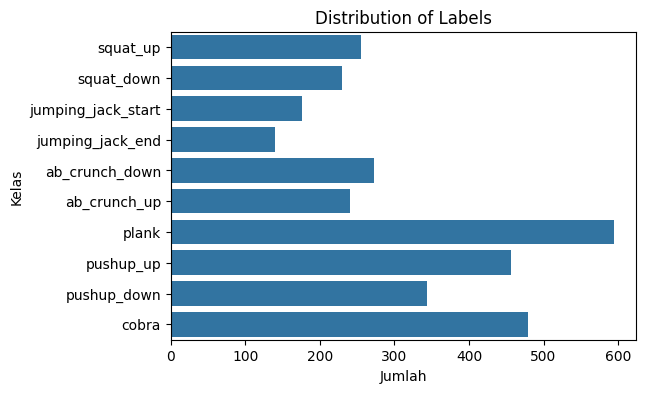

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
# sns.countplot(x=data['label'])
sns.countplot(data['label'])
# plt.xlabel("Kelas")
# plt.ylabel("Jumlah")
plt.xlabel("Jumlah")
plt.ylabel("Kelas")
plt.title("Distribution of Labels")
plt.show()

# Data preprocessing

In [ ]:
X = data.iloc[:, :-1].values  # Fitur (landmark pose)
y = data.iloc[:, -1].map(
    {
        "pushup_up": 0,
        "pushup_down": 1,
        "plank": 2,
        "squat_up": 3,
        "squat_down": 4,
        "jumping_jack_start": 5,
        "jumping_jack_end": 6,
        "ab_crunch_down": 7,
        "ab_crunch_up": 8,
        "cobra": 9
    }
).values  # Label numerik
# y = data.iloc[:, -1]

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

# Normalisasi data
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# Encode label (jika label berupa string)
# encoder = LabelEncoder()
# y = encoder.fit_transform(y)

# Save the LabelEncoder
# with open('encoder.pkl', 'wb') as f:
#     pickle.dump(encoder, f)

# Bagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training

In [ ]:
# Random forest

# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report

# # Train model
# model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
# model.fit(X_train, y_train)

# # Evaluasi
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
# y_pred

In [ ]:
# import joblib
# # Simpan model
# joblib.dump(model, "/content/excercise_classifier.joblib")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Bangun model MLP
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Input layer
model.add(Dropout(0.2))  # Dropout untuk mengurangi overfitting
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
# model.add(Dense(len(encoder.classes_), activation='softmax'))  # Output layer
model.add(Dense(len(set(y)), activation='softmax'))  # Output layer

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,466 (91.66 KB)

 Trainable params: 23,466 (91.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)

X_train dtype: float64
y_train dtype: int64


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[callback])

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2628 - loss: 2.0116 - val_accuracy: 0.6804 - val_loss: 1.1381
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7114 - loss: 0.9173 - val_accuracy: 0.9137 - val_loss: 0.4215
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8742 - loss: 0.4279 - val_accuracy: 0.9627 - val_loss: 0.2039
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9290 - loss: 0.2265 - val_accuracy: 0.9686 - val_loss: 0.1357
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9449 - loss: 0.1544 - val_accuracy: 0.9686 - val_loss: 0.1106
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9540 - loss: 0.1250 - val_accuracy: 0.9686 - val_loss: 0.0966
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9538 - loss: 0.1207 - val_accuracy: 0.9706 - val_loss: 0.0936
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9623 - loss: 0.0847 - val_accuracy: 0.9686 - val_lo

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9431 - loss: 0.1789
Test Accuracy: 0.9530


In [ ]:
# Save the model
model.save('model1.h5')

In [ ]:
import tensorflow as tf

# Simpan model dalam format TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('pose_classifier.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpmfxtrfp6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 99), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132697363428944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132697363427024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132697357203792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132697357204560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132697323242320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132697357205328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132697357203600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132697323243856: TensorSpec(shape=(), dtype=tf.resource, name=None)


# K-Fold Cross Validation

In [ ]:
# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(model, X, y, cv=5)
# print(scores.mean())  # Jika terlalu tinggi, bisa overfitting

In [ ]:
# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# import numpy as np

# train_sizes, train_scores, val_scores = learning_curve(
#     model, X, y, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
# )

# plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Score")
# plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Score")
# plt.xlabel("Training Set Size")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.show()

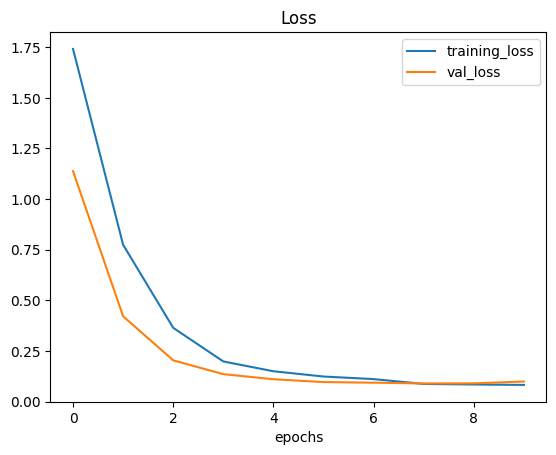

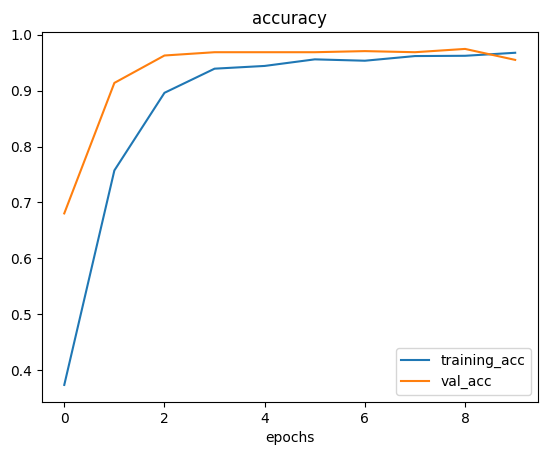

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot
  plt.plot(epochs, loss, label ='training_loss')
  plt.plot(epochs, val_loss, label ='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label ='training_acc')
  plt.plot(epochs, val_accuracy, label ='val_acc')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

plot_loss_curves(history)

In [ ]:
print(X_test[0].shape)  # Cek apakah bentuknya (33, 2) atau (33, 3)
print(X_test[0])  # Lihat isinya

(99,)
[ 0.26303297  0.24926405  0.24980462  0.25054973  0.24385726  0.24081703
  0.23779762  0.25237375  0.23275998  0.27384886  0.26862437  0.33557585
  0.27851382  0.29383761  0.22441605  0.14992468  0.13284391  0.11914238
  0.10681474  0.11508434  0.10619877  0.1254811   0.1152596   0.58414239
  0.53273398  0.74302995  0.67250592  0.87543333  0.80064678  0.91661394
  0.8495158   0.88886058  0.83352309  0.61404824  0.62488586  0.62620646
  0.62799066  0.61843979  0.61462808  0.61072457  0.60162443  0.56857574
  0.59182322  0.58028412  0.51784128  0.38861132  0.76341665  0.57039982
  0.75352281  0.68434411  0.74865019  0.69551343  0.72566056  0.68880439
  0.72011882  0.68408018  0.11111484  0.06690232  0.28255957  0.23766454
  0.36317793  0.31973279  0.3337692   0.29183707  0.52543432  0.45660713
  0.01828459 -0.02998743 -0.02998345 -0.030099    0.00198734  0.00200111
  0.00188045 -0.18414566 -0.03556772 -0.02675293  0.01713622 -0.23898487
  0.04559147 -0.36959493  0.16406225 -0.32404

In [ ]:
import numpy as np

landmarks = np.array(X_test[21]).reshape(33, 3)  # Ubah ke bentuk (33,3)
print(landmarks)
print(landmarks.shape)  # Harusnya jadi (33,3)
print(landmarks[:5])  # Lihat 5 landmark pertama


[[ 0.49000517  0.50324273  0.51052439]
 [ 0.51657611  0.48194543  0.4766047 ]
 [ 0.47128001  0.52804029  0.46737981]
 [ 0.50698739  0.47944388  0.5882076 ]
 [ 0.41953641  0.59597433  0.40614167]
 [ 0.58801663  0.40846628  0.59587747]
 [ 0.40093312  0.57770211  0.41991067]
 [ 0.57131612  0.42690501  0.54980338]
 [ 0.44708246  0.56054217  0.44385689]
 [ 0.55236256  0.43909201  0.54733545]
 [ 0.44679007  0.54919827  0.44237965]
 [ 0.20238672  0.17416292  0.17285326]
 [ 0.17202064  0.17650165  0.17693272]
 [ 0.17753977  0.18464625  0.19116563]
 [ 0.23209555  0.2334159   0.34633428]
 [ 0.3510325   0.57939148  0.58339024]
 [ 0.77378184  0.77152473  0.82106543]
 [ 0.82156277  0.81542522  0.81742191]
 [ 0.80105424  0.80240655  0.66591477]
 [ 0.65993321  0.61809748  0.60627449]
 [ 0.60013157  0.58823258  0.58118576]
 [ 0.53640264  0.59512413  0.58904171]
 [-0.67350274 -0.65185469 -0.65195405]
 [-0.65208191 -0.6486764  -0.64885819]
 [-0.64899945 -0.5159362  -0.50191385]
 [-0.62234199 -0.61804312

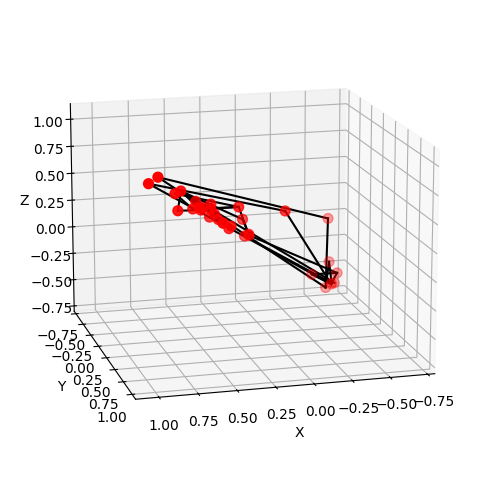

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import mediapipe as mp  # Tambahkan ini

# Ambil POSE_CONNECTIONS dari Mediapipe
mp_pose = mp.solutions.pose
connections = mp_pose.POSE_CONNECTIONS  # <- Tambahkan ini

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

x, y, z = landmarks[:, 0], landmarks[:, 1], landmarks[:, 2]

# Scatter plot untuk semua landmark
ax.scatter(x, y, z, c='r', s=50)

# Hubungkan titik dengan garis
for i, j in connections:
    ax.plot([x[i], x[j]], [y[i], y[j]], [z[i], z[j]], 'black')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=15, azim=75)  # Atur sudut pandang
plt.show()


# Testing

In [ ]:
# import numpy as np
# # print(X_test[0])
# # print(X[0])
# for item in X_test:
#   new_data = np.array([item])
#   print(model.predict(new_data))

In [ ]:
labels = ["pushup_up",
        "pushup_down",
        "plank",
        "squat_up",
        "squat_down",
          "jumping_jack_start",
        "jumping_jack_end",
          "ab_crunch_down",
          "ab_crunch_up",
          "cobra"]

In [ ]:
# Tambahkan dimensi batch ke X_test[0]
# single_sample = np.expand_dims(X_test[0], axis=0)
# print(single_sample)

# Prediksi probabilitas untuk setiap kelas
# y_pred_proba = model.predict(single_sample)
y_pred_proba = model.predict(X_test)

# Prediksi kelas (ambil indeks dengan probabilitas tertinggi)
y_pred = np.argmax(y_pred_proba, axis=1)

# Jika label Anda di-encode menggunakan LabelEncoder, decode kembali ke bentuk aslinya
# y_pred_labels = encoder.inverse_transform(y_pred)

y_pred_labels = [labels[i] for i in y_pred]

# Tampilkan hasil prediksi
print("Predicted Labels:", y_pred_labels)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Labels: ['plank', 'plank', 'ab_crunch_up', 'ab_crunch_down', 'plank', 'ab_crunch_down', 'ab_crunch_down', 'plank', 'squat_down', 'pushup_down', 'pushup_up', 'plank', 'jumping_jack_start', 'cobra', 'plank', 'plank', 'pushup_down', 'pushup_down', 'ab_crunch_up', 'ab_crunch_up', 'cobra', 'cobra', 'ab_crunch_down', 'jumping_jack_end', 'pushup_down', 'squat_down', 'ab_crunch_up', 'jumping_jack_end', 'plank', 'jumping_jack_start', 'ab_crunch_down', 'plank', 'ab_crunch_down', 'jumping_jack_end', 'plank', 'plank', 'squat_down', 'squat_up', 'plank', 'pushup_down', 'plank', 'pushup_down', 'pushup_up', 'jumping_jack_start', 'jumping_jack_start', 'pushup_up', 'pushup_up', 'pushup_up', 'ab_crunch_up', 'plank', 'plank', 'pushup_up', 'plank', 'squat_up', 'cobra', 'pushup_up', 'ab_crunch_down', 'ab_crunch_up', 'pushup_down', 'ab_crunch_down', 'squat_down', 'cobra', 'pushup_down', 'pushup_up', 'squat_up', 'cobra', 'squat_up', 'plank', 'squat_up', 'ab_cr

In [ ]:
print(y_pred)
index2 = np.argmax(y_pred_proba, axis=1)
class_names = [labels[i] for i in index2]

print(class_names)

[2 2 8 7 2 7 7 2 4 1 0 2 5 9 2 2 1 1 8 8 9 9 7 6 1 4 8 6 2 5 7 2 7 6 2 2 4
 3 2 1 2 1 0 5 5 0 0 0 8 2 2 0 2 3 9 0 7 8 1 7 4 9 1 0 3 9 3 2 3 7 2 9 5 7
 3 5 2 0 9 2 1 4 9 1 4 6 0 2 7 3 0 0 4 5 2 0 3 1 2 1 0 3 6 6 3 8 8 0 7 2 3
 3 2 0 4 6 2 0 1 8 2 7 9 0 3 8 1 2 7 0 9 1 0 2 8 5 0 1 2 3 4 5 4 8 3 2 3 7
 5 8 9 4 9 2 5 7 3 0 0 4 3 7 2 0 9 2 7 4 2 0 2 4 9 8 2 0 8 5 9 8 7 2 0 4 9
 3 5 0 7 3 5 3 5 0 8 4 7 8 5 4 3 0 9 1 1 1 0 9 3 9 2 1 7 2 2 1 0 5 8 0 8 4
 3 7 9 4 4 0 0 9 0 3 0 9 9 3 8 2 7 3 3 1 4 6 1 0 2 9 2 9 0 0 4 7 2 9 9 9 5
 0 8 2 6 2 3 2 1 6 8 2 8 2 4 9 0 9 2 1 9 2 5 8 8 7 9 2 5 6 1 2 9 8 7 3 0 6
 7 4 0 0 9 9 2 0 9 2 7 0 0 7 2 0 2 6 8 7 9 4 0 4 6 4 9 0 0 0 5 9 1 5 6 1 3
 5 2 1 0 0 0 2 8 8 1 2 2 3 1 3 0 3 0 8 9 1 2 1 0 1 5 1 9 3 4 9 7 8 2 7 9 0
 6 9 0 0 7 0 2 1 8 3 1 9 7 0 2 5 1 1 3 1 2 1 1 8 2 9 7 9 7 2 6 6 1 2 9 0 0
 2 0 8 0 1 1 3 2 0 1 1 2 0 0 0 2 2 3 9 7 5 7 3 0 1 0 0 8 1 3 3 2 2 9 2 8 4
 2 2 3 9 7 6 6 2 0 7 3 2 2 5 2 2 5 2 2 9 2 9 2 3 1 1 2 2 3 9 6 6 2 3 3 2 2
 2 7 2 1 0 7 0 7 2 3 7 4 

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("model1.h5")

In [ ]:
single_sample = np.expand_dims(X_test[0], axis=0)
predict = model.predict(single_sample)
index = np.argmax(predict, axis=1)
print(index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
[2]


In [ ]:
# data2 = pd.read_csv("/content/sample_data/squat_data3_test.csv")
# Z = data2.iloc[:, :-1].values

In [ ]:
# print(Z[0])

In [ ]:
# single_sample = np.expand_dims(Z[20], axis=0)
# print(single_sample)
# print(Z[20])
# predict = model.predict(single_sample)
# index = np.argmax(predict, axis=1)
# get_label = labels[index[0]]
# print(get_label)